# **Book Recommender**

# **Importing Dependancies**

In [1]:
#Importing libraries for data cleaning, processing and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express  as px
import time
from wordcloud import WordCloud
from collections import Counter
import re
import joblib

#Libraries for Natural Language processing
import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string
import urllib
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Libraries for data engineering and modeling
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
Random_state=42 
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-adjust width
pd.set_option('display.max_colwidth', None)

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# **Reading the data**

In [73]:
Books=pd.read_csv("goodreads_data.csv")
Books.drop(columns=["Unnamed: 0", 'URL'	], inplace=True)
print(Books.shape)
Books.head()

(10000, 6)


,Book,Author,Description,Genres,Avg_Rating,Num_Ratings
0,To Kill a Mockingbird,Harper Lee,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it. ""To Kill A Mockingbird"" became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, ""To Kill A Mockingbird"" takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American literature.","['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical']",4.27,"5,691,311"
1,"Harry Potter and the Philosopher’s Stone (Harry Potter, #1)",J.K. Rowling,"Harry Potter thinks he is an ordinary boy - until he is rescued by an owl, taken to Hogwarts School of Witchcraft and Wizardry, learns to play Quidditch and does battle in a deadly duel. The Reason ... HARRY POTTER IS A WIZARD!","['Fantasy', 'Fiction', 'Young Adult', 'Magic', 'Childrens', 'Middle Grade', 'Classics']",4.47,"9,278,135"
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work ""her own darling child"" and its vivacious heroine, Elizabeth Bennet, ""as delightful a creature as ever appeared in print."" The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen's radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book the most superb comedy of manners of Regency England.Alternate cover edition of ISBN 9780679783268","['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Audiobook']",4.28,"3,944,155"
3,The Diary of a Young Girl,Anne Frank,"Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a world classic—a powerful reminder of the horrors of war and an eloquent testament to the human spirit. In 1942, with the Nazis occupying Holland, a thirteen-year-old Jewish girl and her family fled their home in Amsterdam and went into hiding. For the next two years, until their whereabouts were betrayed to the Gestapo, the Franks and another family lived cloistered in the “Secret Annexe” of an old office building. Cut off from the outside world, they faced hunger, boredom, the constant cruelties of living in confined quarters, and the ever-present threat of discovery and death. In her diary Anne Frank recorded vivid impressions of her experiences during this period. By turns thoughtful, moving, and surprisingly humorous, her account offers a fascinating commentary on human courage and frailty and a compelling self-portrait of a sensitive and spirited young woman whose promise was tragically cut short.--back cover","['Classics', 'Nonfiction', 'History', 'Biography', 'Memoir', 'Historical', 'Holocaust']",4.18,"3,488,438"
4,Animal Farm,George Orwell,"Librarian's note: There is an Alternate Cover Edition for this edition of this book here.A farm is taken over by its overworked, mistreated animals. With flaming idealism and stirring slogans, they set out to create a paradise of progress, justice, and equality. Thus the stage is set for one of the most telling satiric fables ever penned –a razor-edged fairy tale for grown-ups that records the evolution from revolution against tyranny to a totalitarianism just as terrible. When Animal Farm was first published, Stalinist Ru

# **Preprocessing**

**Information about the data**

In [74]:
print("Datatypes of each column")
print(Books.dtypes)
print("")
print("Number of null values in each column")
print(Books.isnull().sum())
print("")
print("Number of Duplicates")
print(Books.duplicated().sum())

Datatypes of each column
Book            object
Author          object
Description     object
Genres          object
Avg_Rating     float64
Num_Ratings     object
dtype: object

Number of null values in each column
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
dtype: int64

Number of Duplicates
19


**Dropping the Duplicates from the dataframe**

In [70]:
Books =Books.drop_duplicates()
Books.head()

,Book,Author,Description,Genres,Avg_Rating,Num_Ratings
0,To Kill a Mockingbird,Harper Lee,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it. ""To Kill A Mockingbird"" became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, ""To Kill A Mockingbird"" takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American literature.","['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical']",4.27,"5,691,311"
1,"Harry Potter and the Philosopher’s Stone (Harry Potter, #1)",J.K. Rowling,"Harry Potter thinks he is an ordinary boy - until he is rescued by an owl, taken to Hogwarts School of Witchcraft and Wizardry, learns to play Quidditch and does battle in a deadly duel. The Reason ... HARRY POTTER IS A WIZARD!","['Fantasy', 'Fiction', 'Young Adult', 'Magic', 'Childrens', 'Middle Grade', 'Classics']",4.47,"9,278,135"
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work ""her own darling child"" and its vivacious heroine, Elizabeth Bennet, ""as delightful a creature as ever appeared in print."" The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen's radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book the most superb comedy of manners of Regency England.Alternate cover edition of ISBN 9780679783268","['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Audiobook']",4.28,"3,944,155"
3,The Diary of a Young Girl,Anne Frank,"Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a world classic—a powerful reminder of the horrors of war and an eloquent testament to the human spirit. In 1942, with the Nazis occupying Holland, a thirteen-year-old Jewish girl and her family fled their home in Amsterdam and went into hiding. For the next two years, until their whereabouts were betrayed to the Gestapo, the Franks and another family lived cloistered in the “Secret Annexe” of an old office building. Cut off from the outside world, they faced hunger, boredom, the constant cruelties of living in confined quarters, and the ever-present threat of discovery and death. In her diary Anne Frank recorded vivid impressions of her experiences during this period. By turns thoughtful, moving, and surprisingly humorous, her account offers a fascinating commentary on human courage and frailty and a compelling self-portrait of a sensitive and spirited young woman whose promise was tragically cut short.--back cover","['Classics', 'Nonfiction', 'History', 'Biography', 'Memoir', 'Historical', 'Holocaust']",4.18,"3,488,438"
4,Animal Farm,George Orwell,"Librarian's note: There is an Alternate Cover Edition for this edition of this book here.A farm is taken over by its overworked, mistreated animals. With flaming idealism and stirring slogans, they set out to create a paradise of progress, justice, and equality. Thus the stage is set for one of the most telling satiric fables ever penned –a razor-edged fairy tale for grown-ups that records the evolution from revolution against tyranny to a totalitarianism just as terrible. When Animal Farm was first published, Stalinist Ru

In [71]:
#Looking for duplicated books
d_Books = Books[Books['Book'].duplicated(keep=False)]
#Dropping books that have the same Book name, Author and number of rating (Assume that this may also be duplicated books)
d1_Books= d_Books.drop_duplicates(subset=['Book', 'Author', 'Num_Ratings'])
#differentiating books that have the same name 
d1_Books['Number'] = d1_Books.groupby('Book').cumcount() + 1
d1_Books['Book']=  d1_Books['Book'] + " " +d1_Books['Number'].astype(str)
#Dropping the number column
d1_Books=d1_Books.drop(columns='Number', axis=1)

In [72]:
# dropping books with which have the same name (Aimed to differentiate them by number)
Books.drop(index=d_Books.index, axis=0, inplace=True)
#Joined the edited dataframe to the 
Books_edit=pd.concat([Books, d1_Books])

(9771, 6)

In [88]:
Books_edit.reset_index(inplace=True)
Books_edit.to_csv('Book.csv')
Books_edit.shape

(9936, 8)

# **Exploratory Data Analysis**

## **Twenty University offering most courses in Coursera platform**

Text(0.5, 1.0, 'Top twenty University offering most courses on coursera platform')

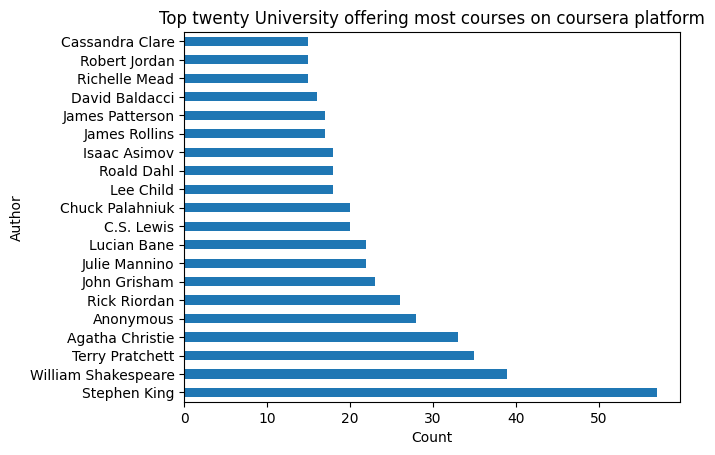

In [76]:
Books['Author'].value_counts()[:20].plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Author')
plt.title('Top twenty University offering most courses on coursera platform')


## **Distribution of ratings across Books**

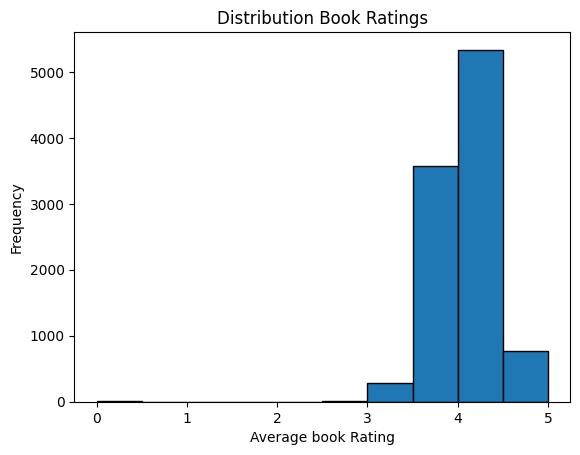

In [77]:
Books['Avg Rating'] = pd.to_numeric(Books['Avg_Rating'], errors='coerce')

# Drop rows with NaN values in 'Course Rating'
rating = Books.dropna(subset=['Avg Rating'])

# Plotting the histogram
rating['Avg Rating'].plot(kind='hist', bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Average book Rating')
plt.ylabel('Frequency')
plt.title('Distribution Book Ratings')

# Show the plot
plt.show()

## **Skills that stands out the most in Coursera Courses**

Category: Genres, Number of Words: 72774


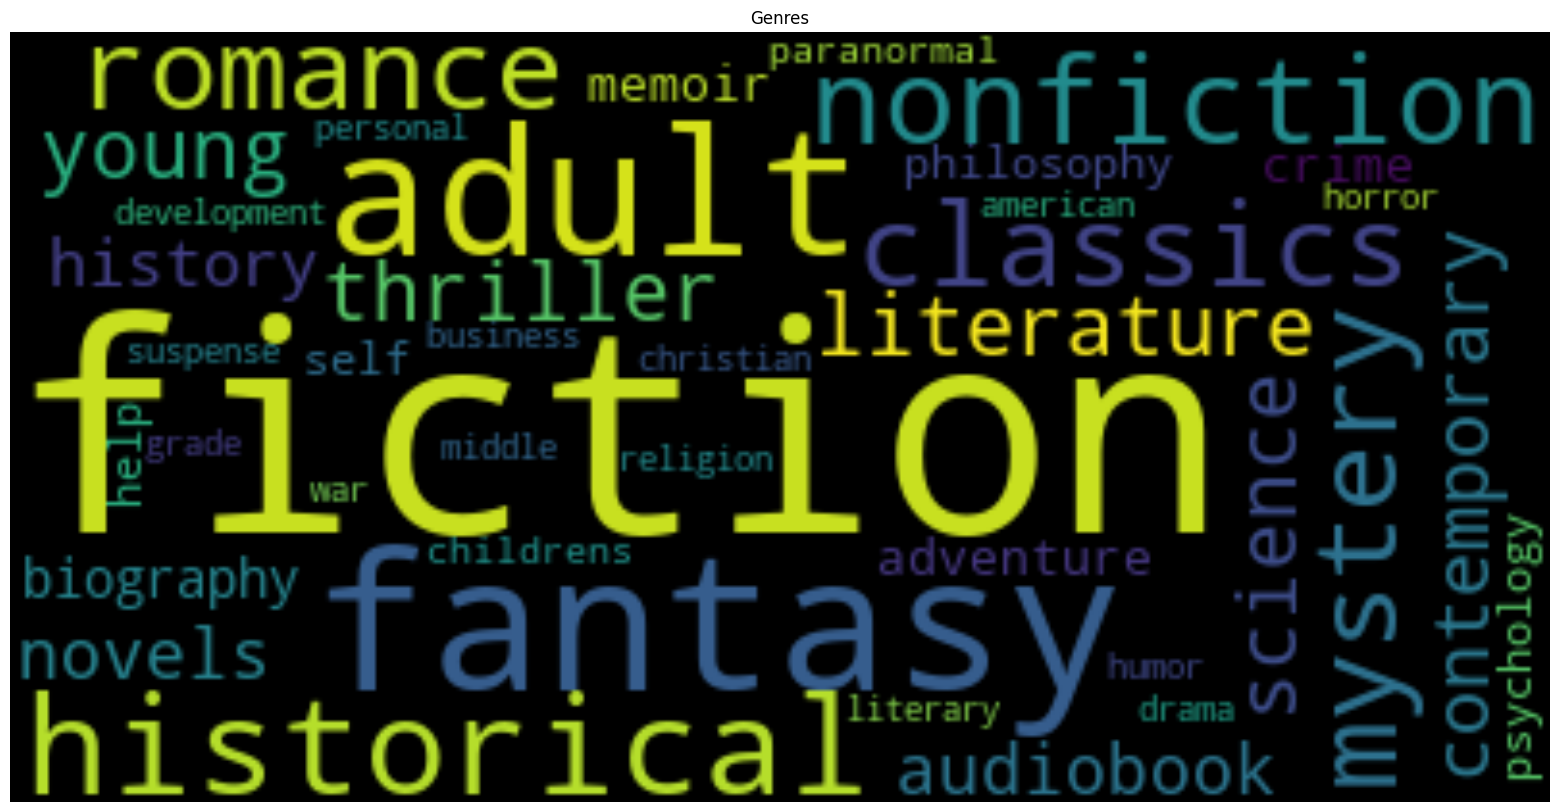

In [85]:
#A function of removing stopwords
def remove_stopwords(text):
    """
    Remove stopwords from the given text.

    Args:
        text (str): The input text from which stopwords are to be removed.

    Returns:
        str: The text with stopwords removed.
    """
    stop_words = set(stopwords.words('english'))   # Set of stopwords in English
    tokens = text.split()                          # Splitting the text into individual words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Filtering out stopwords
    return ' '.join(filtered_tokens)              # Joining the filtered tokens back into a text

#Removing stop words using remove_stopwords function
Books['Updated_Genres'] =Books['Genres'].apply(remove_stopwords)


#A function for removing punctuations
def remove_punctuation(post):
    """
    Remove punctuation marks from the given post.

    Args:
        post (str): The input post from which punctuation marks are to be removed.

    Returns:
        str: The post with punctuation marks removed.
    """
    return ''.join([l for l in post if l not in string.punctuation])

#Removing punctuation using remove_punctuation function
Books['Updated_Genres']  = Books['Updated_Genres'] .apply(remove_punctuation).str.lower() #Words converted to lower case

# Defining the categories and their respective texts
categories = ['Genres']
texts = [Books['Updated_Genres']]

# Creating a single subplot
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the figsize as needed

# Generating word cloud
text = ' '.join(texts[0])
words = text.split()
print(f"Category: {categories[0]}, Number of Words: {len(words)}")

# Generating word cloud
wordcloud = WordCloud(max_words=40)
wordcloud.generate_from_frequencies(Counter(words))

# Plotting the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title(categories[0])

# Showing the plot
plt.savefig("image_streamlit.png", format='png')  # Save the word cloud as an image
plt.show()

Category: Description, Number of Words: 264856


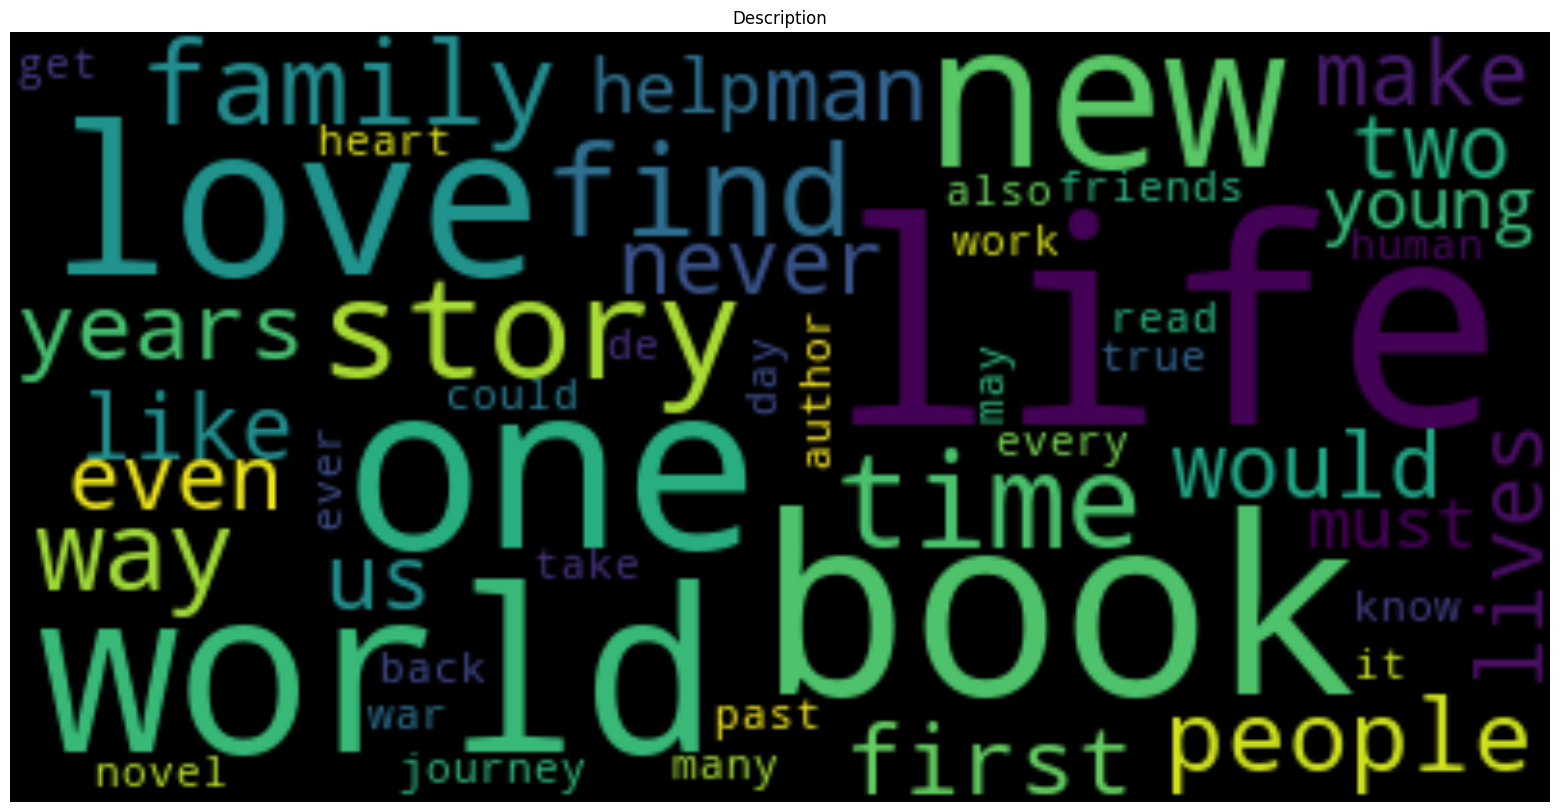

In [84]:
Books1=Books.dropna()
#Removing stop words using remove_stopwords function
Books1['Description_update'] =Books1['Description'].apply(remove_stopwords)

#Removing punctuation using remove_punctuation function
Books1['Description_update']  = Books1['Description_update'] .apply(remove_punctuation).str.lower() #Words converted to lower case

# Defining the categories and their respective texts
categories = ['Description']
texts = [Books1['Description_update']]

# Creating a single subplot
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the figsize as needed

# Generating word cloud
text = ' '.join(texts[0])
words = text.split()
print(f"Category: {categories[0]}, Number of Words: {len(words)}")

# Generating word cloud
wordcloud = WordCloud(max_words=50)
wordcloud.generate_from_frequencies(Counter(words))

# Plotting the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title(categories[0])

# Showing the plot
plt.savefig("image_streamlit.png", format='png')  # Save the word cloud as an image
plt.show()

# **Building a Recommender system**

### **Joining columns used for similarity**

In [91]:
def combine_columns(row):
    return f"{row['Author']}, {row['Description']}, {', '.join(row['Genres'])}, {row['Avg_Rating']}, {row['Num_Ratings']}"


Books['Books info'] =  Books.apply(combine_columns, axis=1)
Books['Books info'].head()


0                                                                                                                                                                                                  Harper Lee, The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it. "To Kill A Mockingbird" became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, "To Kill A Mockingbird" takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiec

### **Book names as index and feature**

In [118]:
book_titles=Books['Book']
indices=pd.Series(Books.index ,index=Books['Book'])
indices.head(),  book_titles.head()

(Book
 To Kill a Mockingbird                                          0
 Harry Potter and the Philosopher’s Stone (Harry Potter, #1)    1
 Pride and Prejudice                                            2
 The Diary of a Young Girl                                      3
 Animal Farm                                                    4
 dtype: int64,
 0                                          To Kill a Mockingbird
 1    Harry Potter and the Philosopher’s Stone (Harry Potter, #1)
 2                                            Pride and Prejudice
 3                                      The Diary of a Young Girl
 4                                                    Animal Farm
 Name: Book, dtype: object)

### **Vectorization**

In [98]:
#Building a vectorizer
t_vec = TfidfVectorizer(analyzer='word', ngram_range=(1,3),min_df=0.0, stop_words='english')
#Fitting the vectorizer
tf_bookinfo = t_vec.fit_transform(Books['Books info'])

### **Cosine Similarity**

In [99]:
#checking for similarities
cosine_similarity_info = cosine_similarity(tf_bookinfo)
cosine_similarity_info[:3]

array([[1.00000000e+00, 1.91928572e-04, 4.24445930e-03, ...,
        2.26768502e-03, 1.80153461e-03, 2.52625767e-03],
       [1.91928572e-04, 1.00000000e+00, 2.01575894e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.24445930e-03, 2.01575894e-04, 1.00000000e+00, ...,
        2.50787157e-03, 9.11847101e-04, 3.13276589e-03]])

### **Consent based Filtering**

In [119]:
def content_based_recommender(Book_Name, n =5):
            book_index = indices[Book_Name]
            score = list(enumerate(cosine_similarity_info[book_index]))
            score = sorted(score, key=lambda x: x[1], reverse=True)
            score = score[1:n+1] 
            book_indices = [i[0] for i in score]
            book=book_titles.iloc[book_indices].reset_index()
            #Books=list(enumerate(Books, start=1))
            book_1=list(book['Book'])
            index_1=list(book['index'])
            rating=[]
            for i in index_1:
                rating.append(Books.loc[i, "Avg_Rating"])
            author=[]
            for i in index_1:
                author.append(Books.loc[i, "Author"])
            dictionary={"Book name": book_1, "Author": author, "Rating": rating}  
            df=pd.DataFrame(dictionary)
            return df

In [120]:
content_based_recommender("Animal Farm")

,Book name,Author,Rating
0,Animal Farm / 1984,George Orwell,4.30
1,"Kerri's War (The King Trilogy, #3)",Stephen Douglass,3.83
2,Homage to Catalonia,George Orwell,4.09
3,We,Yevgeny Zamyatin,3.90
4,Just So Stories,Rudyard Kipling,4.06
